In [0]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('/content/winequality-red.csv')

In [0]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [0]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
print("Total quantity of wine quality 3 : ",len([a for a in data['quality'] if a==3]))
print("Total quantity of wine quality 4 : ",len([a for a in data['quality'] if a==4]))
print("Total quantity of wine quality 5 : ",len([a for a in data['quality'] if a==5]))
print("Total quantity of wine quality 6 : ",len([a for a in data['quality'] if a==6]))
print("Total quantity of wine quality 7 : ",len([a for a in data['quality'] if a==7]))
print("Total quantity of wine quality 8 : ",len([a for a in data['quality'] if a==8]))

Total quantity of wine quality 3 :  10
Total quantity of wine quality 4 :  53
Total quantity of wine quality 5 :  681
Total quantity of wine quality 6 :  638
Total quantity of wine quality 7 :  199
Total quantity of wine quality 8 :  18


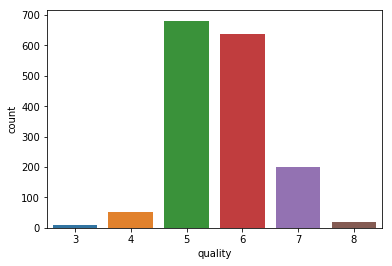

In [0]:
sns.countplot(x='quality', data=data)

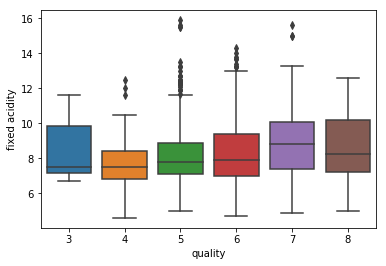

In [0]:
sns.boxplot('quality', 'fixed acidity', data = data)

In [0]:
reviews = []
for i in data['quality']:
    if i <= 5:
        reviews.append(0)
    else:
        reviews.append(1)
data['Reviews'] = reviews

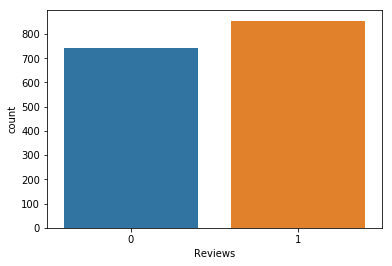

In [0]:
sns.countplot(x='Reviews', data=data)

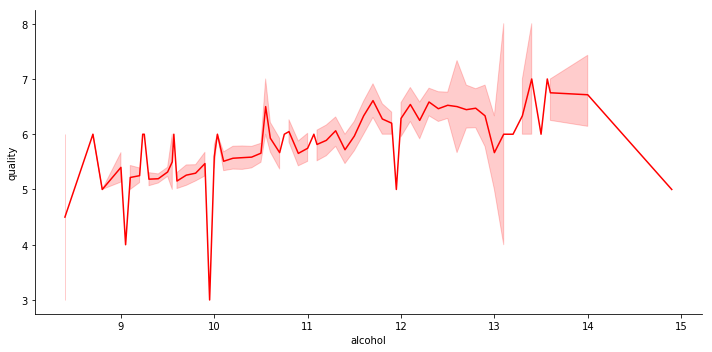

In [0]:
sns.relplot(data = data,x = 'alcohol',y = 'quality',kind = 'line',height=5, aspect=2, color='red')

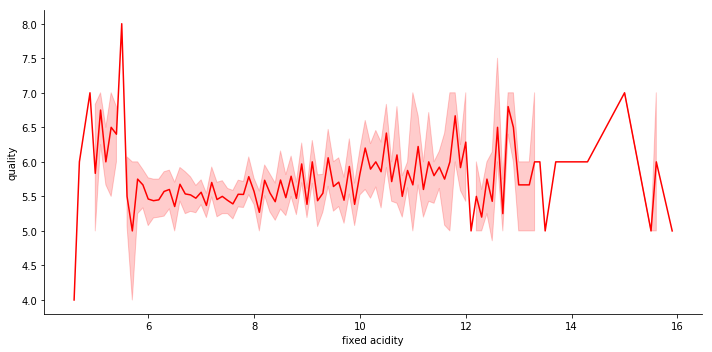

In [0]:
sns.relplot(data = data,x = 'fixed acidity',y = 'quality',kind = 'line',height=5, aspect=2, color='red')

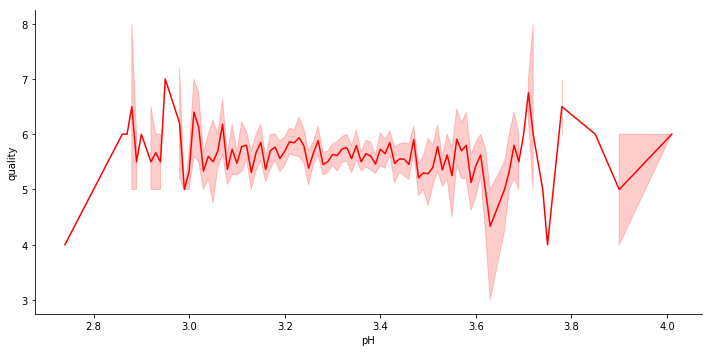

In [0]:
sns.relplot(data = data,x = 'pH',y = 'quality',kind = 'line',height=5, aspect=2, color='red')

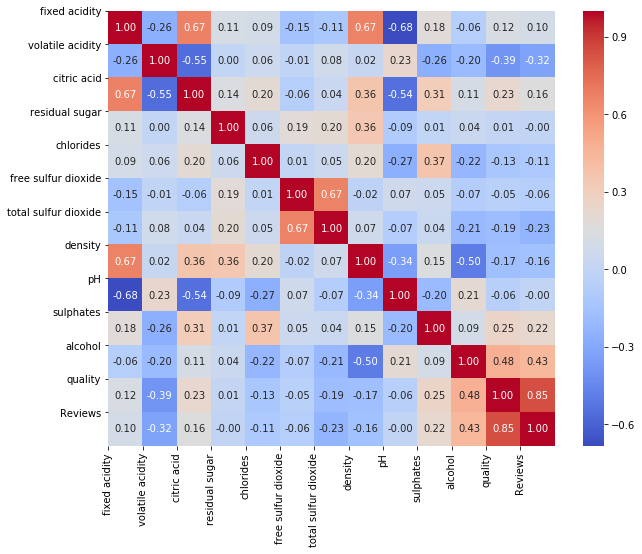

In [0]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [0]:
data['Reviews'].head(20)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    1
Name: Reviews, dtype: int64

In [0]:
data['quality'].head(20)

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
Name: quality, dtype: int64

In [0]:
columns = data.columns
print(columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')


In [0]:
X = data.iloc[:,0:11]
y = data.iloc[:,12]
y_mul = data.iloc[:,11]

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_s = minmax.fit_transform(X)

In [0]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression
from sklearn.decomposition import PCA
X_s_best=SelectKBest(score_func=chi2,k=6).fit_transform(X_s,y)
pca = PCA(n_components=4)
X_s_pca = pca.fit_transform(X_s)

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_s,y,test_size = 0.3,random_state = 42)

In [0]:
print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [0]:
dct = DecisionTreeClassifier()
dct_model = dct.fit(X_train,y_train)
y_pred_dct = dct_model.predict(X_test)
con_fu_dct = confusion_matrix(y_test,y_pred_dct)
clfreport_dct = classification_report(y_test,y_pred_dct)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

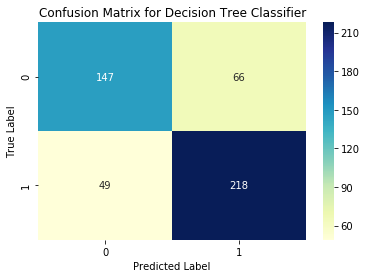

In [0]:
sns.heatmap(data = con_fu_dct,annot = True,fmt = "d",cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Classifier')

In [0]:
print(clfreport_dct)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       213
           1       0.77      0.82      0.79       267

    accuracy                           0.76       480
   macro avg       0.76      0.75      0.76       480
weighted avg       0.76      0.76      0.76       480



In [0]:
rft = RandomForestClassifier(n_estimators = 100,random_state = 42)
rft_model = rft.fit(X_train,y_train)
y_pred_rft = rft_model.predict(X_test)
con_fu_rft = confusion_matrix(y_test,y_pred_rft)
clfreport_rft = classification_report(y_test,y_pred_rft)

In [0]:
print(clfreport_rft)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       213
           1       0.82      0.84      0.83       267

    accuracy                           0.81       480
   macro avg       0.81      0.80      0.81       480
weighted avg       0.81      0.81      0.81       480



In [0]:
print(con_fu_rft)

[[165  48]
 [ 44 223]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

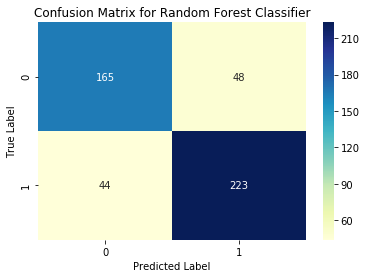

In [0]:
sns.heatmap(data = con_fu_rft,annot = True,fmt = "d",cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest Classifier')

In [0]:
svc_lin  = SVC(kernel = 'linear')
svc_lin.fit(X_train, y_train)
y_pred_svc_lin=svc_lin.predict(X_test)
lin_svc_conf_matrix = confusion_matrix(y_test, y_pred_svc_lin)
lin_svc_clf = classification_report(y_test, y_pred_svc_lin)
print(lin_svc_conf_matrix)
print(lin_svc_clf)

[[164  49]
 [ 87 180]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       213
           1       0.79      0.67      0.73       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Classifier')

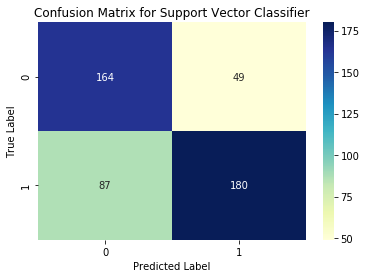

In [0]:
sns.heatmap(data = lin_svc_conf_matrix,annot = True,fmt = "d",cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Support Vector Classifier')

In [0]:
svc_rbf  = SVC(kernel = 'rbf')
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf=svc_rbf.predict(X_test)
rbf_svc_conf_matrix = confusion_matrix(y_test, y_pred_svc_rbf)
rbf_svc_clf = classification_report(y_test, y_pred_svc_rbf)
print(rbf_svc_conf_matrix)
print(rbf_svc_clf)

[[165  48]
 [ 89 178]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       213
           1       0.79      0.67      0.72       267

    accuracy                           0.71       480
   macro avg       0.72      0.72      0.71       480
weighted avg       0.73      0.71      0.72       480



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Classifier with rbf kernel')

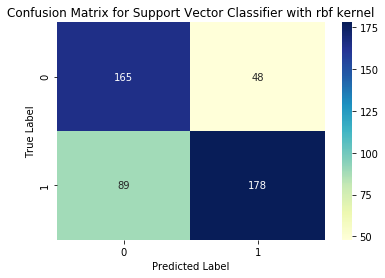

In [0]:
sns.heatmap(data = rbf_svc_conf_matrix,annot = True,fmt = "d",cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Support Vector Classifier with rbf kernel')

In [0]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(random_state=42)
logit_reg_model = logit_reg.fit(X_train,y_train)
y_pred_logit = logit_reg_model.predict(X_test)
cf_logit = confusion_matrix(y_test,y_pred_logit)
clss_report_logit = classification_report(y_test,y_pred_logit)
print("Confusion Matrix : ")
print(cf_logit)
print("Classification report : ")
print(clss_report_logit)

Confusion Matrix : 
[[156  57]
 [ 78 189]]
Classification report : 
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       213
           1       0.77      0.71      0.74       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(y_pred_logit.shape)
print(type(y_test))

(480,)
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Confusion Matrix for Logistic regression')

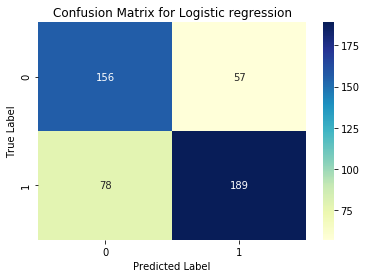

In [0]:
sns.heatmap(data = cf_logit,annot = True,fmt = "d",cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic regression')

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24,input_dim=11,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
    
])

In [0]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,epochs=20)

Train on 1119 samples
Epoch 1/20
1119/1119 [==============================] - 0s 268us/sample - loss: 0.6877 - acc: 0.5353
Epoch 2/20
1119/1119 [==============================] - 0s 125us/sample - loss: 0.6630 - acc: 0.5728
Epoch 3/20
1119/1119 [==============================] - 0s 166us/sample - loss: 0.6137 - acc: 0.7069
Epoch 4/20
1119/1119 [==============================] - 0s 143us/sample - loss: 0.5581 - acc: 0.7310
Epoch 5/20
1119/1119 [==============================] - 0s 137us/sample - loss: 0.5348 - acc: 0.7444
Epoch 6/20
1119/1119 [==============================] - 0s 163us/sample - loss: 0.5277 - acc: 0.7435
Epoch 7/20
1119/1119 [==============================] - 0s 145us/sample - loss: 0.5147 - acc: 0.7551
Epoch 8/20
1119/1119 [==============================] - 0s 136us/sample - loss: 0.5120 - acc: 0.7525
Epoch 9/20
1119/1119 [==============================] - 0s 165us/sample - loss: 0.5065 - acc: 0.7426
Epoch 10/20
1119/1119 [==============================] - 0s 138us/sam

In [0]:
model.evaluate(X_test,y_test, verbose=2)

480/480 - 0s - loss: 0.5191 - acc: 0.7542


[0.519125493367513, 0.75416666]

In [0]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn>0.5)

In [0]:
len(y_x)

480

In [0]:
print(type(y_x))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [0]:
con = confusion_matrix(y_test,y_pred_nn)
clf = classification_report(y_test,y_pred_nn)

Text(0.5, 1.0, 'Confusion Matrix for Deep Neural Network')

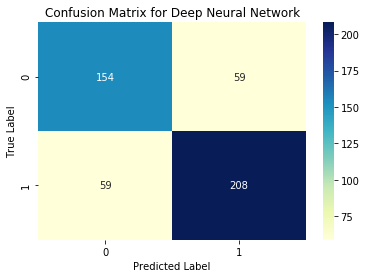

In [0]:
sns.heatmap(data = con,annot = True,fmt = "d",cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Deep Neural Network')

In [0]:
print(clf)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       213
           1       0.78      0.78      0.78       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [0]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [0]:
acc_logit = accuracy_score(y_test,y_pred_logit)
acc_svc_lin = accuracy_score(y_test,y_pred_svc_lin)
acc_svc_rbf = accuracy_score(y_test,y_pred_svc_rbf)
acc_dct = accuracy_score(y_test,y_pred_dct)
acc_rft = accuracy_score(y_test,y_pred_rft)
acc_nn = accuracy_score(y_test,y_pred_nn)

